In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
## Load data
cali = fetch_california_housing()
X = cali.data
y = cali.target
feature_names = cali.feature_names
print(X.shape)

(20640, 8)


In [67]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(16512, 8)
(4128, 8)
(16512,)


In [68]:
## Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
## helper functions
def plot_coefficients(coefficients, feature_names, title):
    plt.figure(figsize=(12,6))
    plt.barh(feature_names, coefficients)
    plt.xlabel('Coefficient value')
    plt.title(title)
    plt.grid(True)
    plt.show()

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)     # Fit the model
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    ## Print results
    print(f"\n{model_name} Results:")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Testing RMSE: {test_rmse:.4f}")
    print(f"Training R-square: {train_r2:.4f}")
    print(f"Testing R-square: {test_r2:.4f}")

    #Plot coefficients
    if hasattr(model, 'coef_'):
        plot_coefficients(model.coef_, feature_names, f"{model_name} Coefficients")
    
    return {
        "model": model,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2
    }


In [70]:
## Model training
print("\n=== Basic Models ===")
models = {
    'Linear Regression' : LinearRegression(),
    'Ridge Regression' : Ridge(alpha=0.1),
    'Lasso Regression' : Lasso(alpha=0.1),
    'ElasticNet Regression' : ElasticNet(alpha=0.1, l1_ratio=0.5)
}


=== Basic Models ===



Linear Regression Results:
Training RMSE: 0.7197
Testing RMSE: 0.7456
Training R-square: 0.6126
Testing R-square: 0.5758


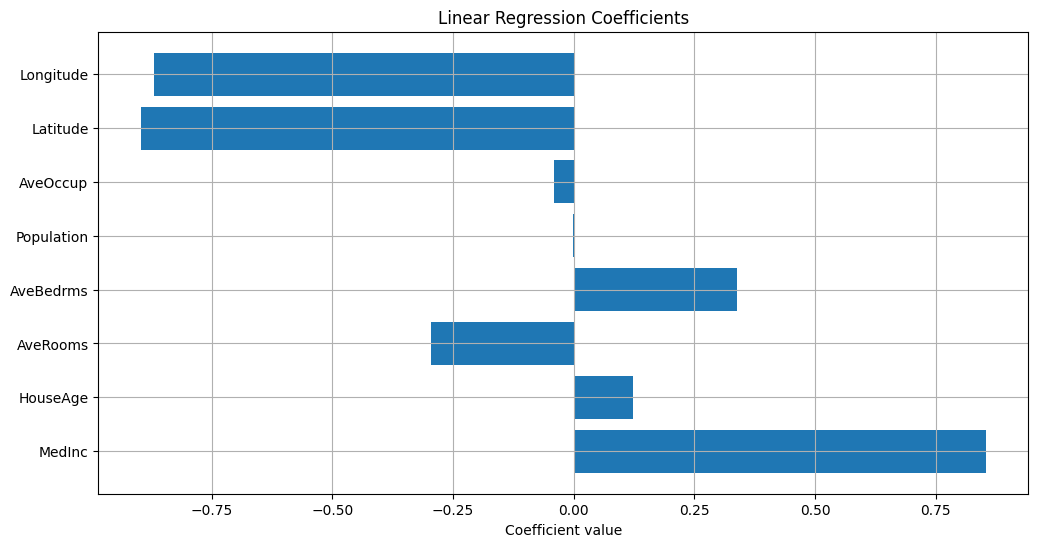


Ridge Regression Results:
Training RMSE: 0.7197
Testing RMSE: 0.7456
Training R-square: 0.6126
Testing R-square: 0.5758


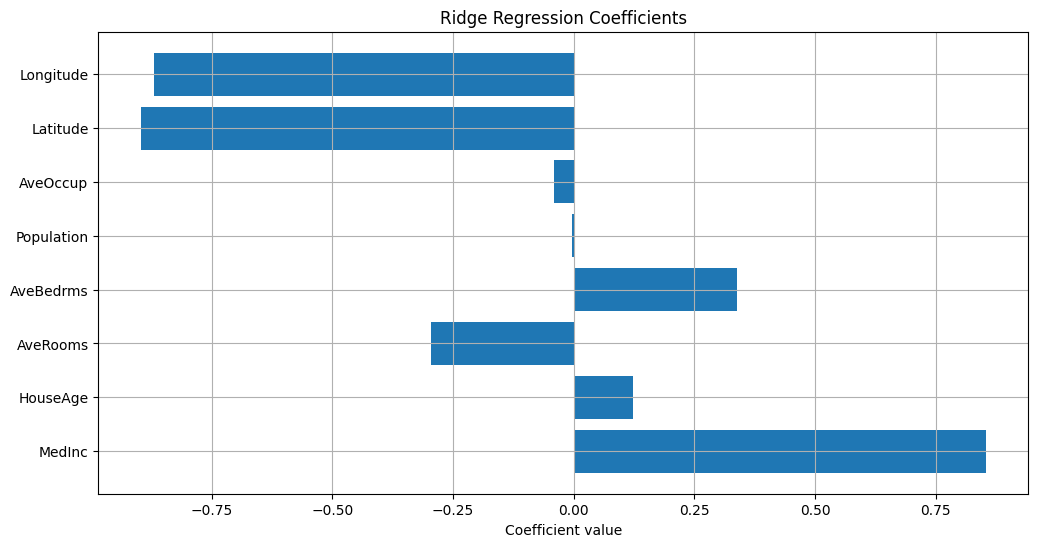


Lasso Regression Results:
Training RMSE: 0.8197
Testing RMSE: 0.8244
Training R-square: 0.4974
Testing R-square: 0.4814


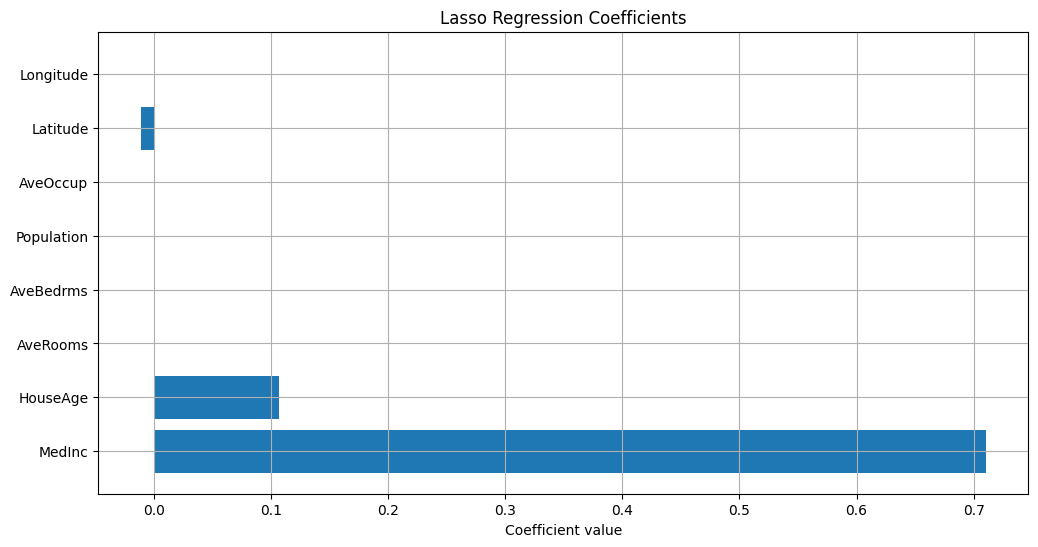


ElasticNet Regression Results:
Training RMSE: 0.7920
Testing RMSE: 0.7974
Training R-square: 0.5308
Testing R-square: 0.5148


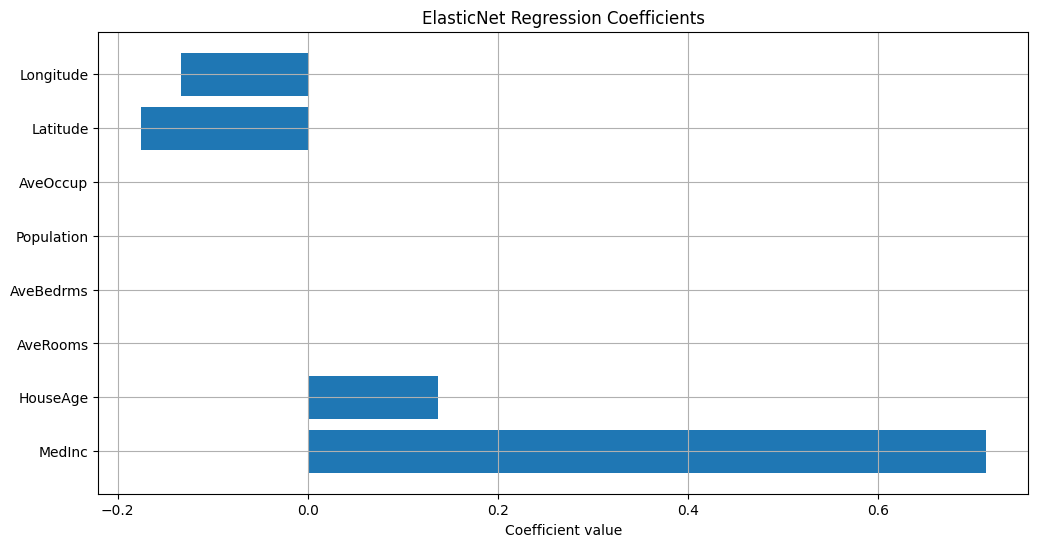

In [71]:
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test, name)

Akaike Information Criterion (AIC) & BIC
AIC vs alpha for Ridge
